In [1]:
import datetime
import time
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from config import get_from_config, save_to_config
from acnet_reader.acnet_reader import fetch_data, get_interpolated_df, fetch_interpolated_data
import fur.path_assistant as path_assistant
import lattice.lattice as lattice
shift_03_16_2020 = path_assistant.PathAssistant('shift_03_16_2020')
waveforms_dir = shift_03_16_2020.get_waveforms_dir()
results_dir = shift_03_16_2020.get_results_dir()
acnet_data_dir = shift_03_16_2020.get_acnet_data_dir()
bpm_data_dir = shift_03_16_2020.get_bpm_data_dir()
bpm_files_df = shift_03_16_2020.get_bpm_files_df()
acnet_data_df = shift_03_16_2020.get_acnet_data_df("all_acnet_data_for_shift_03_16_2020.csv")
from fur.extending_with_acnet_data import get_fluctuations_df_with_acnet_data
from fur.extending_with_acnet_data import get_fluctuations_df_with_acnet_data
fluctuations_df = get_fluctuations_df_with_acnet_data(
    shift_03_16_2020,
    "res_df_comb_filter_no_nd_filters_ROUND_data_03_16_2020.csv",
    "IOTA_1NL_100MeV_v8.6.1.4.6ds_data.txt"
)
from config import get_from_config
lattice_file = shift_03_16_2020.get_6dsim_dir().fi("IOTA_1NL_100MeV_v8.6.1.4.6ds_data.txt")

/opt/homebrew/Caskroom/miniforge/base/envs/env/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ilobach/fur/lattice/lattice.py:178: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(e_um*1e4*beta_cm+(1e4*dispersion_cm*dpp)**2)


In [2]:
lattice_df = lattice.read_lattice_file(lattice_file)
lattice_df

S_cm  Dispersion_cm_X  Beta_cm_X   Beta_cm_Y       Alpha_X  \
0       0.000000       -24.202678  79.069986  115.457907  3.815143e-07   
1       4.666667       -24.202678  79.345437  115.646529 -5.902559e-02   
2       9.333333       -24.202678  80.171797  116.212393 -1.180516e-01   
3      14.000000       -24.202678  81.549066  117.155498 -1.770775e-01   
4      18.604167       -24.202678  83.447781  118.455670 -2.353130e-01   
..           ...              ...        ...         ...           ...   
911  3976.606466       -24.202678  84.129372  118.922362  2.529686e-01   
912  3981.606466       -24.202678  81.915897  117.406657  1.897265e-01   
913  3986.606466       -24.202678  80.334842  116.324011  1.264844e-01   
914  3991.606466       -24.202678  79.386208  115.674423  6.324232e-02   
915  3996.606466       -24.202678  79.069995  115.457893  2.137762e-07   

          Alpha_Y        dS           dDx        dDx/dS         Phi_X  \
0   -1.043665e-07  4.666667 -3.552714e-15 -7.612958e-16 -1.167784e-07   
1   -4.041888e-02  4.666667 -3.552714e-15 -7.612958e-16  1.800453e-02   
2   -8.083765e-02  4.666667  0.000000e+00  0.000000e+00  3.563802e-02   
3   -1.212564e-01  4.666667 -3.552714e-15 -7.612958e-16  5.255426e-02   
4   -1.611339e-01  4.604167 -3.552714e-15 -7.716301e-16  6.824872e-02   
..            ...       ...           ...           ...           ...   
911  1.732234e-01  5.000000 -7.105427e-15 -1.421085e-15 -7.277504e-02   
912  1.299176e-01  5.000000 -1.065814e-14 -2.131628e-15 -5.605616e-02   
913  8.661173e-02  5.000000 -1.421085e-14 -2.842171e-15 -3.810628e-02   
914  4.330589e-02  5.000000 -7.105427e-15 -1.421085e-15 -1.928085e-02   
915  6.337172e-08  5.000000 -1.065814e-14 -2.131628e-15 -6.543515e-08   

            H  
0    7.408242  
1    7.408245  
2    7.408254  
3    7.408267  
4    7.408285  
..        ...  
911  7.408291  
912  7.408270  
913  7.408254  
914  7.408245  
915  7.408241  

[916 rows x 11 columns]

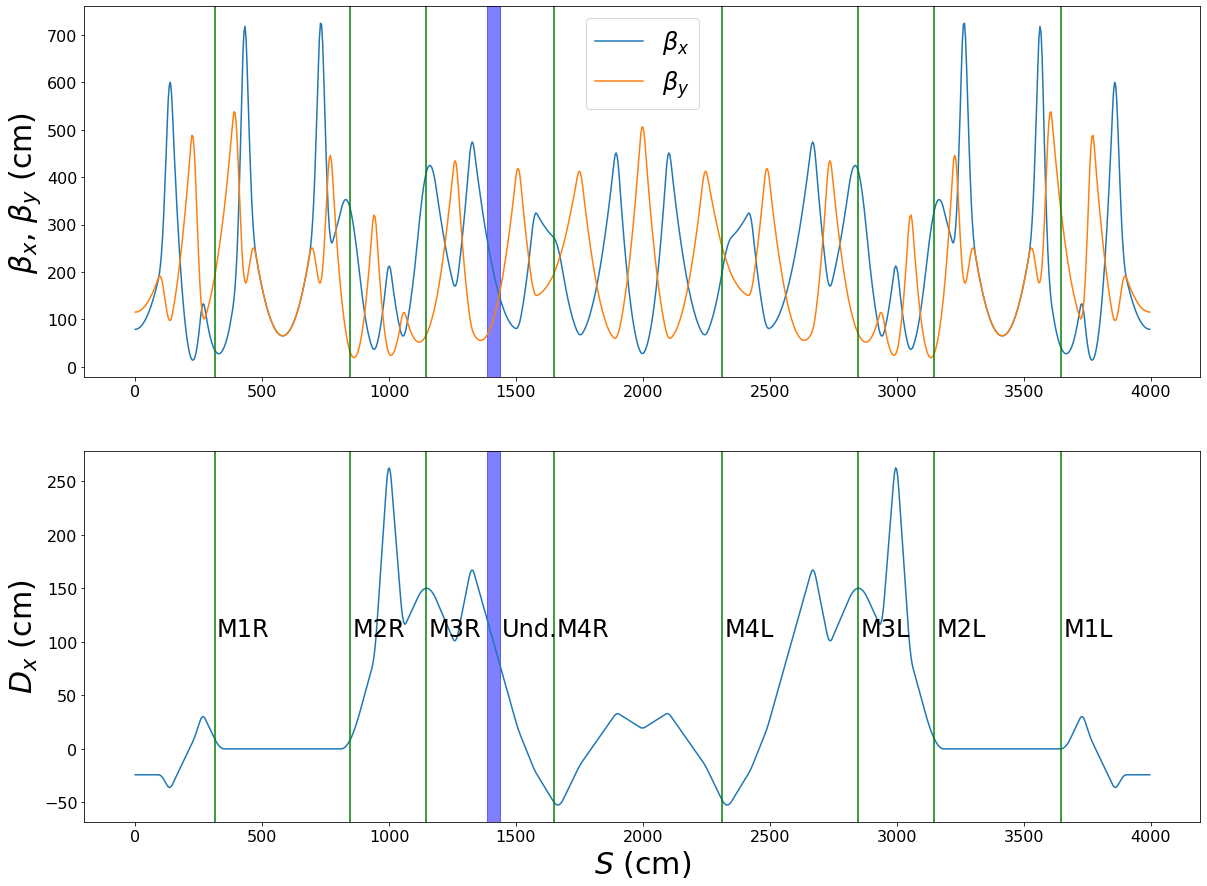

In [3]:
lattice.plot_lattice(lattice_df)

/var/folders/gy/wdr0lhkn46n55mh2jbgygp500000gn/T/ipykernel_39080/651497275.py:22: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


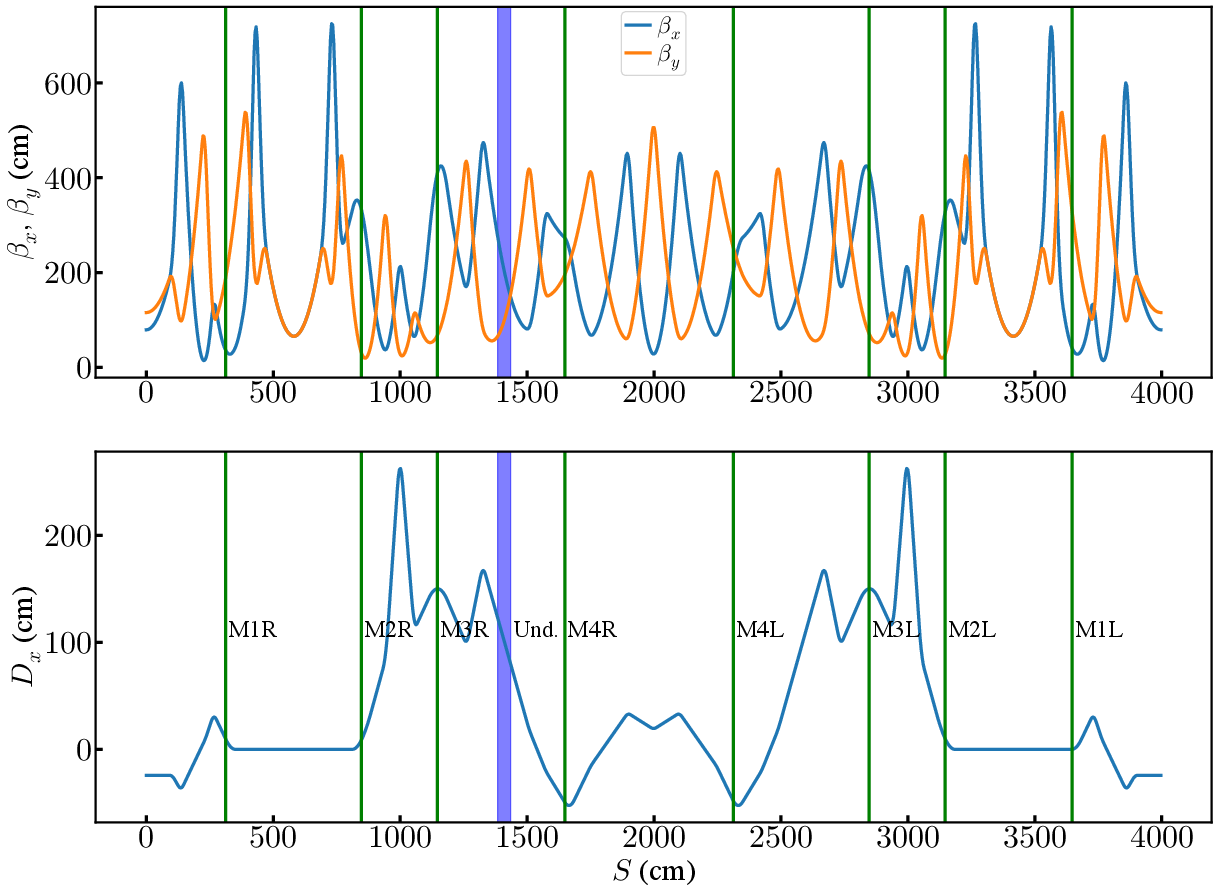

In [4]:
from fur.path_assistant import get_plot_style_sheet
import matplotlib as mpl
mpl.use("pgf")
plt.style.use(get_plot_style_sheet("prab"))
plt.rc('pgf', preamble=\
       r'\usepackage{amsmath}'
       +r'\usepackage{unicode-math}'
       +r'\usepackage{amsthm}'
       +r'\setmainfont{Times}'
       +r'\DeclareMathAlphabet{\mathcal}{OMS}{cmsy}{m}{n}'
       +r'\let\mathbb\relax'
       +r'\DeclareMathAlphabet{\mathbb}{U}{msb}{m}{n}'
       +r'\usepackage{siunitx}'
      +r'\newcommand{\e}{\epsilon}'
      )

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, figsize=(20, 15))
ax0, ax1 = axs
lattice.plot_lattice(lattice_df, axs)
plt.savefig(path_assistant.get_PRL_images_dir().fi('lattice.png'),bbox_inches='tight',dpi=300)
plt.show()

In [5]:
start, end = lattice.undulator_range

In [6]:
idx=1

In [7]:
cameras_df = lattice.get_cameras_df(
    lattice_df,
    fluctuations_df.loc[idx,lattice.acnet_devices_X].values,
    fluctuations_df.loc[idx,lattice.acnet_devices_Y].values)
cameras_df


Name         S_cm  Dispersion_cm_X   Beta_cm_X   Beta_cm_Y   Alpha_X  \
0  M1R   312.390772         9.722311   36.225434  188.171560  0.508217   
1  M2R   847.531424         8.867605  332.373347   30.217598  1.107789   
2  M3R  1146.760637       149.997534  410.057483   67.853144 -1.054932   
3  M4R  1648.557835       -49.483645  272.884031  195.416364  0.304775   
4  M4L  2312.048374       -47.892921  200.362880  252.677345 -1.549672   
5  M3L  2846.836442       149.983921  415.934446   71.284732  0.832799   
6  M2L  3146.927526         9.901680  327.556295   27.031383 -1.229046   
7  M1L  3646.794132         0.035522   40.729689  328.847554  0.616955   

    Alpha_Y        dS       dDx    dDx/dS     Phi_X           H  \
0 -1.458162  4.891733 -2.428465 -0.496441 -0.359753    7.295672   
1  0.754704  4.737408  2.129491  0.449506  0.479594   76.946994   
2 -0.549460  4.737408  0.220231  0.046488 -0.340224  102.672536   
3 -0.585537  4.702819 -1.765538 -0.375931 -0.431533   59.806032   
4  1.007521  4.707737 -2.210668 -0.470412 -0.099626   13.444070   
5  0.607294  4.737408  0.323153  0.068213  0.368840  110.859844   
6 -0.642134  4.737408 -2.522276 -0.532417 -0.569773  106.692381   
7  2.350427  4.155523  0.035522  0.007265  0.007767    0.010021   

  ACNET_device_X ACNET_device_Y Measured_sigma_um_X Measured_sigma_um_Y  
0      N:ITC1RSH      N:ITC1RSV            198.8374           447.97668  
1      N:ITC2RSH      N:ITC2RSV             586.151            179.2395  
2      N:ITC3RSH      N:ITC3RSV           765.85699           270.33981  
3      N:ITC4RSH      N:ITC4RSV             732.771            105.9989  
4      N:ITC4LSH      N:ITC4LSV            470.0831           529.41602  
5      N:ITC3LSH      N:ITC3LSV           787.49597           269.33292  
6      N:ITC2LSH      N:ITC2LSV           628.12201            179.3288  
7      N:ITC1LSH      N:ITC1LSV            201.1698             547.008

In [8]:
328/27

12.148148148148149

/opt/homebrew/Caskroom/miniforge/base/envs/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/ilobach/fur/lattice/lattice.py:305: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


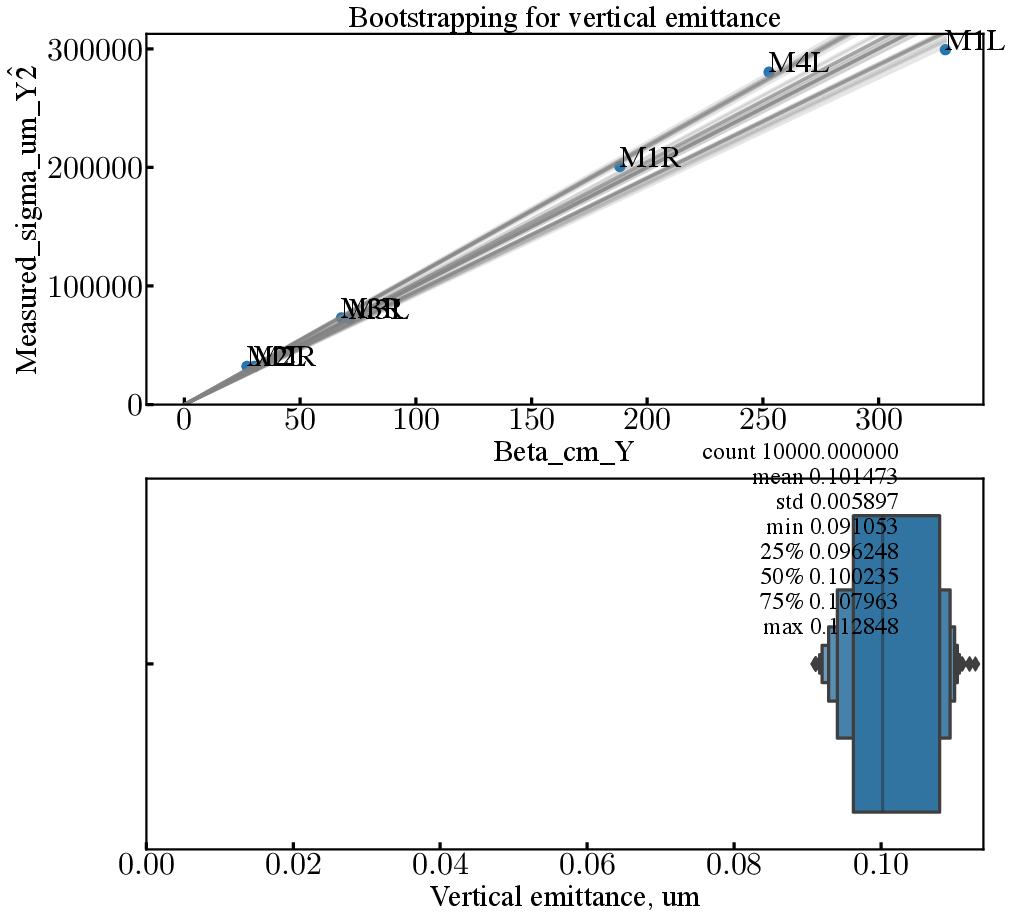

In [9]:
ey_um_description = lattice.get_ey_um_least_squares(cameras_df, show_plot=True)

/Users/ilobach/fur/lattice/lattice.py:220: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


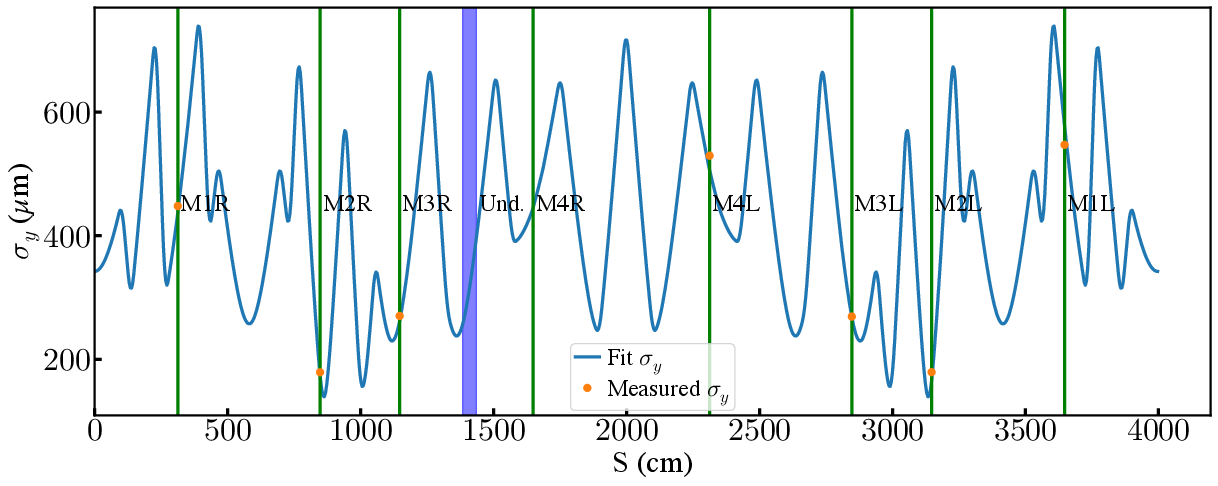

In [10]:
lattice.show_sigma_fit(lattice_df, cameras_df, 'Y', ey_um_description["mean"])

/opt/homebrew/Caskroom/miniforge/base/envs/env/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ilobach/fur/lattice/lattice.py:220: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


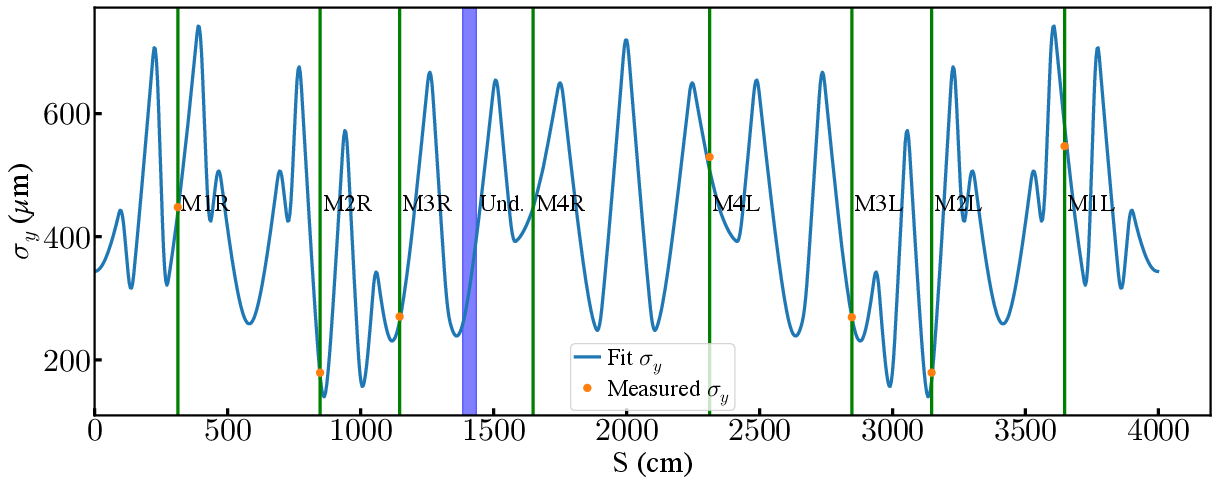

In [11]:
ey_um, ey_err = lattice.get_e_um_Y_scipy_curve_fit(cameras_df)
lattice.show_sigma_fit(lattice_df, cameras_df, 'Y', ey_um)

In [12]:
ey_err/ey_um

0.03527541048913697

In [13]:
sigma_z_cm, Vrf_V = fluctuations_df.loc[:,["N:IWCMBR", "N:IRFEPA"]].mean().values
dpp0 = lattice.get_dpp(sigma_z_cm, Vrf_V)
dpp0

0.00029019274247975724

/Users/ilobach/fur/lattice/lattice.py:178: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(e_um*1e4*beta_cm+(1e4*dispersion_cm*dpp)**2)
/Users/ilobach/fur/lattice/lattice.py:220: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


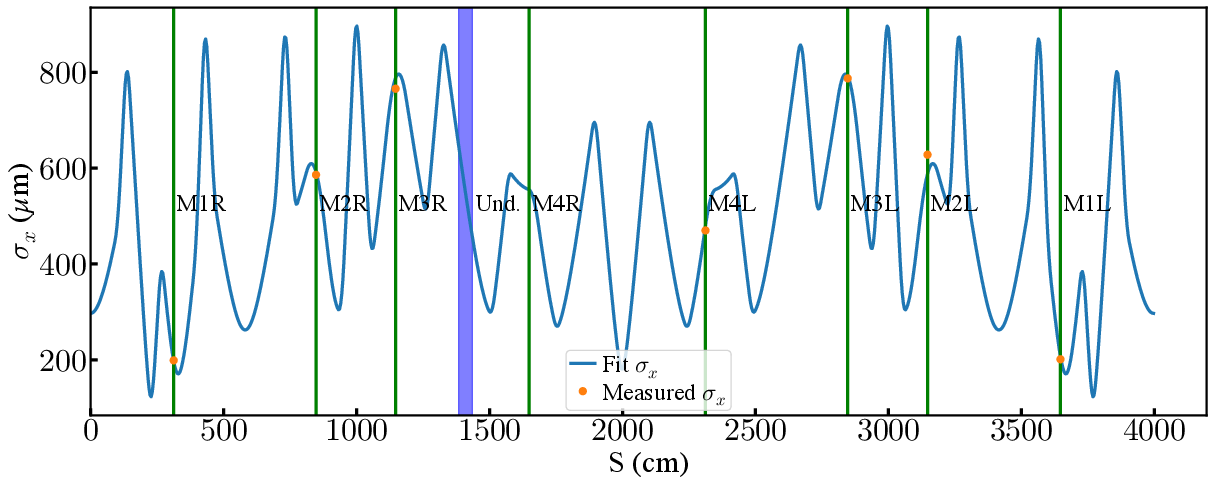

In [14]:
popt, perr = lattice.get_e_um_X_scipy_curve_fit(cameras_df, dpp0, 0)
ex_um, dpp = popt
ex_err, dpp_err = perr
lattice.show_sigma_fit(lattice_df, cameras_df, 'X', ex_um, dpp=dpp)

In [12]:
ldf = lattice_df

In [13]:
import plotly.graph_objects as go


fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=ldf['S_cm'], y=ldf['Beta_cm_X'],
                    mode='lines+markers',
                    name='Beta_X'))
fig.add_trace(go.Scatter(x=ldf['S_cm'],y=ldf['Beta_cm_X']/(1+ldf['Alpha_X']**2),
                    mode='lines+markers',
                    name='Alpha_X'))
fig.add_trace(go.Scatter(x=ldf['S_cm'],y=ldf['Beta_cm_Y'],
                    mode='lines+markers',
                    name='Beta_Y'))

fig.show()

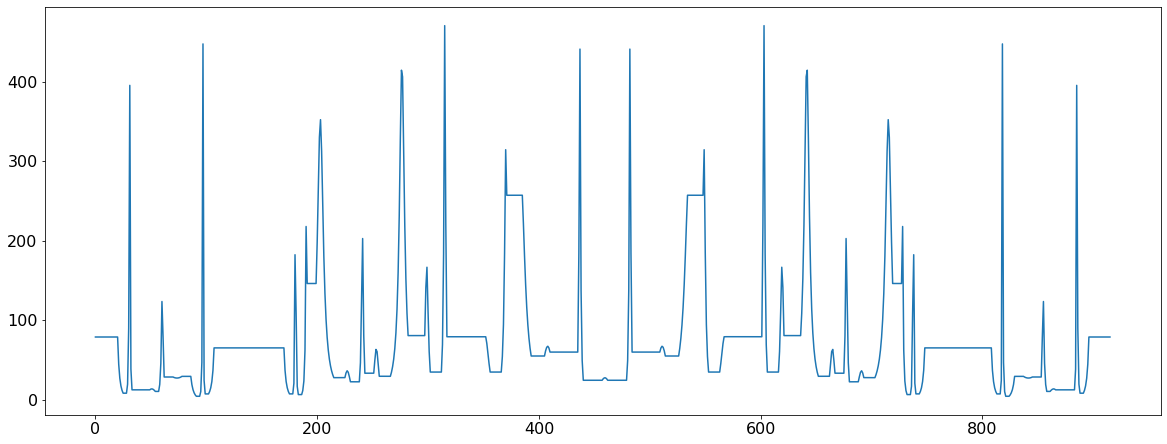

In [14]:
plt.plot(ldf['Beta_cm_X']/(1+ldf['Alpha_X']**2))

In [15]:
ex_err/ex_um

0.031224540014193395

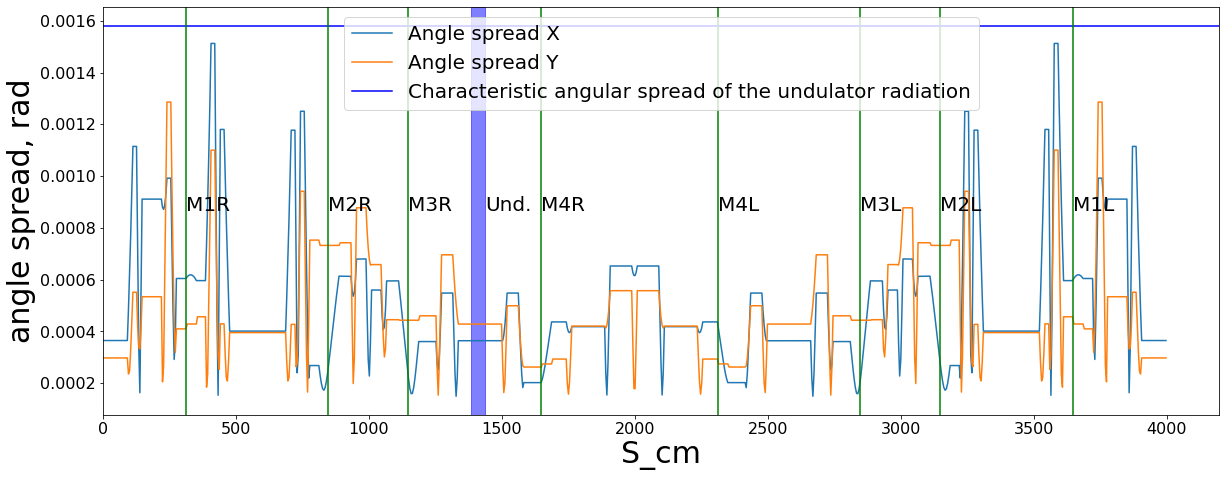

In [16]:
lattice.show_angle_spread_X_Y(lattice_df, ex_um, ey_um)

In [17]:
emmitance_6D = {
        "ex_um": ex_um,
        "ex_err_um": ex_err,
        "ey_um": ey_um,
        "ey_err_um": ey_err,
        "dp/p": dpp,
        "dp/p_err": dpp_err
    }

In [18]:
lattice.get_undulator_df(lattice_df, emmitance_6D)

S_cm  Dispersion_cm_X   Beta_cm_X   Beta_cm_Y   Alpha_X   Alpha_Y  \
Start   1383.90       122.936779  276.365925   65.280075  1.574657 -0.412112   
Middle  1409.65       101.204607  203.630155   98.414182  1.250287 -0.874287   
End     1435.40        79.472435  147.585260  155.330115  0.925917 -1.336463   

              dS       dDx    dDx/dS     Phi_X  ...  Sigma_um_Y  \
Start   4.758436 -4.015967 -0.843968 -0.143447  ...  258.413852   
Middle  5.000000 -4.219839 -0.843968 -0.222539  ...  317.288484   
End     5.000000 -4.219839 -0.843968 -0.345381  ...  398.614690   

        Sigma_um_Y_err  Angle_spread_rad_X  Angle_spread_rad_Y     ex_um  \
Start         4.557827            0.000439            0.000428  0.105294   
Middle        5.596241            0.000439            0.000428  0.105294   
End           7.030648            0.000439            0.000428  0.105294   

          ex_err     ey_um    ey_err     dp/p  dp/p_err  
Start   0.003288  0.102294  0.003608  0.00029       0.0  
Middle  0.003288  0.102294  0.003608  0.00029       0.0  
End     0.003288  0.102294  0.003608  0.00029       0.0  

[3 rows x 23 columns]

In [19]:
from lattice.summary_in_undulator import get_summary_in_undulator

In [20]:
und_summary = get_summary_in_undulator(
    lattice_file,
    fluctuations_df.loc[idx,lattice.acnet_devices_X].values,
    fluctuations_df.loc[idx,lattice.acnet_devices_Y].values,
    dpp,
    0
    )

/home/ilobach/fur/env/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning:

invalid value encountered in sqrt

/home/ilobach/fur/lattice/lattice.py:173: RuntimeWarning:

invalid value encountered in sqrt



In [21]:
und_summary[0]

S_cm  Dispersion_cm_X   Beta_cm_X   Beta_cm_Y   Alpha_X   Alpha_Y  \
Start   1383.90       122.936779  276.365925   65.280075  1.574657 -0.412112   
Middle  1409.65       101.204607  203.630155   98.414182  1.250287 -0.874287   
End     1435.40        79.472435  147.585260  155.330115  0.925917 -1.336463   

              dS       dDx    dDx/dS     Phi_X  ...  Sigma_um_Y  \
Start   4.758436 -4.015967 -0.843968 -0.143447  ...  258.413852   
Middle  5.000000 -4.219839 -0.843968 -0.222539  ...  317.288484   
End     5.000000 -4.219839 -0.843968 -0.345381  ...  398.614690   

        Sigma_um_Y_err  Angle_spread_rad_X  Angle_spread_rad_Y     ex_um  \
Start         4.557827            0.000439            0.000428  0.105294   
Middle        5.596241            0.000439            0.000428  0.105294   
End           7.030648            0.000439            0.000428  0.105294   

          ex_err     ey_um    ey_err     dp/p  dp/p_err  
Start   0.003288  0.102294  0.003608  0.00029       0.0  
Middle  0.003288  0.102294  0.003608  0.00029       0.0  
End     0.003288  0.102294  0.003608  0.00029       0.0  

[3 rows x 23 columns]

# Sigma_X error can be made smaller, if I independently estimate dpp and do not fit it here.

In [22]:
und_summary[1]

{'ex_um': 0.10529359168733768,
 'ex_err_um': 0.0032877439668794165,
 'ey_um': 0.10229418205031438,
 'ey_err_um': 0.003608469262475346,
 'dp/p': 0.00029019274247975735,
 'dp/p_err': 0}

In [23]:
und_summary[1].values()

dict_values([0.10529359168733768, 0.0032877439668794165, 0.10229418205031438, 0.003608469262475346, 0.00029019274247975735, 0])